#### Image Classification using ImageLoader Class ####

1. In this example we shall learn how to load data using the ImageFolder Class
2. In this example we will also see the use of transforms that we can do on the data
3. This should be used when the images are structured into directories where each directory has a category of images
4. We can transform while loading the images
5. After ImageFolder, we use DataLoader with shuffle=True so that randomization in the model does not get skewed towards larger groups that have more images.

In [2]:
'''Import torch libraries'''
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets # Important library for this lesson
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary

'''Import other libraries'''
import numpy as np
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
import os

In [3]:
torch.manual_seed(42) # So that weights are always initialized to some particular random value

In [4]:
# Image directory
img_path_train = './exotic/train/' # Path to training images
img_path_test = './exotic/test//' # Path to test imagess

In [5]:
# Check directory and files are correctly routed
files =['./exotic/train/bear/009_0001.jpg','./exotic/train/chimp/038_0001.jpg','./exotic/train/giraffe/084_0001.jpg','./exotic/train/gorilla/090_0001.jpg','./exotic/train/llama/134_0001.jpg', \
        './exotic/train/ostrich/151_0001.jpg','./exotic/train/porcupine/164_0001.jpg','./exotic/train/skunk/186_0001.jpg','./exotic/train/zebra/250_0001.jpg','./exotic/train/chimp/038_0001.jpg'] # take a list of images from the train file to see if they are correctly routed

for root,_,file in os.walk(img_path_train): # Check the number of files in the training directory
    print(f"Directories: {root}\n Length: {len(file)}") # Print the number of files in the training directory

for root,_,file in os.walk(img_path_test): # Check the number of files in the test directory
    print(f"Directories: {root}\n Length: {len(file)}") # Print the number of files in the test directory
    

Directories: ./exotic/train/
 Length: 0
Directories: ./exotic/train/gorilla
 Length: 60
Directories: ./exotic/train/chimp
 Length: 60
Directories: ./exotic/train/giraffe
 Length: 60
Directories: ./exotic/train/bear
 Length: 60
Directories: ./exotic/train/zebra
 Length: 60
Directories: ./exotic/train/triceratops
 Length: 60
Directories: ./exotic/train/porcupine
 Length: 60
Directories: ./exotic/train/skunk
 Length: 60
Directories: ./exotic/train/ostrich
 Length: 60
Directories: ./exotic/train/llama
 Length: 60
Directories: ./exotic/test//
 Length: 0
Directories: ./exotic/test//gorilla
 Length: 10
Directories: ./exotic/test//chimp
 Length: 10
Directories: ./exotic/test//giraffe
 Length: 10
Directories: ./exotic/test//bear
 Length: 10
Directories: ./exotic/test//zebra
 Length: 10
Directories: ./exotic/test//triceratops
 Length: 10
Directories: ./exotic/test//porcupine
 Length: 10
Directories: ./exotic/test//skunk
 Length: 10
Directories: ./exotic/test//ostrich
 Length: 10
Directories: ./e

In [6]:
# Collected the first image in each sub-directory
print(files) # Print the first image in each sub-directory
print(files[1][28:32]) # Print the label of the first image in each sub-directory

['./exotic/train/bear/009_0001.jpg', './exotic/train/chimp/038_0001.jpg', './exotic/train/giraffe/084_0001.jpg', './exotic/train/gorilla/090_0001.jpg', './exotic/train/llama/134_0001.jpg', './exotic/train/ostrich/151_0001.jpg', './exotic/train/porcupine/164_0001.jpg', './exotic/train/skunk/186_0001.jpg', './exotic/train/zebra/250_0001.jpg', './exotic/train/chimp/038_0001.jpg']
1.jp


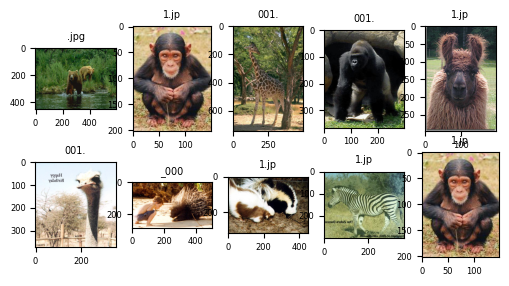

In [7]:
'''Display the images in a grid'''

# using the variable ax for single a Axes
fig, ax = plt.subplots(nrows=2,ncols=int(len(files)/2),figsize=(6,3)) # Create a 2x5 grid of subplots
# plt.figure(figsize=(4,4))


x1 = 0 # Initialize the first index
x2 = 0 # Initialize the second index

for img in files: # Loop through the images
    l = img[28:32] # Extract the label
    i = plt.imread(img) # Read the image
    ax[x1][x2].imshow(i) # Display the image
    ax[x1][x2].tick_params(axis='both', labelsize=6) # Set the tick parameters
    ax[x1][x2].set_title(l,fontsize=7) # Set the title
    x2 = x2+1 # Increment the second index
    if x2 > 4: # Check if the second index is greater than 4
        x2 = 0  # Reset the second index
        x1 = 1  # Increment the first index
plt.show() # Display the images
# io.imshow(test_pic)
plt.show() # Display the images


In [8]:
'''Initialize the transformations'''
transformations = transforms.Compose([ # Compose the transformations which will hold all the transformations
    transforms.Resize((224,224)), # Resize the image to 224x224 pixels
    transforms.ToTensor(), # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize the image using the z-score rather than just dividing
])

test_transformations = transforms.Compose([ # Compose the transformations
    transforms.Resize((224,224)), # Resize the image to 224x224 pixels
    transforms.ToTensor(), # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize the image using the z-score rather than just dividing
])

# AP Statistics: One of the methods of normalizing the data from the world of statistics is (x - x.mean()) / x.std() (Z-score/F-score)

In [9]:
'''Load in each dataset and apply transformations to image sizes using the torchvision.datasets as datasets library'''

train_set = datasets.ImageFolder("./exotic/train/", transform = transformations) # transform the training set with train transformations
test_set = datasets.ImageFolder("./exotic/test/", transform = test_transformations) # transform the test set with test transformations
val_set = datasets.ImageFolder("./exotic/valid/", transform = test_transformations) # transform the validation set with test transformations

In [10]:
'''Put into a Dataloader using torch library'''

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64,shuffle=True) # Load the training set
test_loader = torch.utils.data.DataLoader(test_set, batch_size =4,shuffle=True) # Load the test set
val_loader = torch.utils.data.DataLoader(val_set, batch_size =1,shuffle=True) # Load the validation set

In [12]:
'''Make sure data is in correct shape'''
for l in range(2): # Loop through the first 2 batches
    img,lab = next(iter(train_loader)) # Get the next batch for the training set
    print(img.size(),lab.size()) # Print the size of the image and label

torch.Size([64, 3, 224, 224]) torch.Size([64])
torch.Size([64, 3, 224, 224]) torch.Size([64])


# Build CNN model architecture 

When you have built and trained your model, you can use the model to predict on new images that it has never seen before and typically downloaded from the internet.<br>
To do that we can follow the following process:

1. Write a transpose.compose function similar to the one above so that the same processing is done on the image as during training. You can add additional transforms if required or remove some if not required.
2. Then put the model in evaluation mode (model.eval() as done in earlier examples).
3. Additionally you can also 'with torch.no_grad():' and then feed the transformed image to the model and let it predict an output.
4. The output will be a probability value of the classes and you need to pick the output with highest probability value.
5. For implementing pt. 4 above you can use the coomand:   _, predicted_class = torch.max(output, 1)
6. This will give the index of the class with the highest probability value and you have to link it with the actual label. For e.g. If the class predicted is 6 and the corresponding label to that is say "bird" then you write a little python program to print prediction as bird rather than '6' which does not convey much.
7. If you have a bunch of new images, you can run the prediction in a 'for' loop.
<br><br>
These are the basics of how you implement a prediction function or code.